<center><h1>  <font color='green'>Prueba - Modelos avanzados y redes neuronales</font></h1></center><hr>

### José Quintanilla Inostroza G-90

### <strong><font color="green"> Descripción </font></strong>

En esta ocasión trabajaremos con dos bases de datos. La primera de ellas corresponde a textos de noticias clasificadas como Verdaderas o Falsas; y partir de la información que tenemos de ellas entrenaremos un modelo de red neuronal recurrente que permita clasificarlas noticias como tales.

La segunda base de datos posee información de artículos compartidos por la compañía de informaciones Mashable en un periodo de dos años, para la que tenemos múltiples características que describen los textos junto con la cantidad de veces que cada uno de estos artículos fue compartido. Nuestra misión respecto de esta segunda base de datos será entrenar múltiples modelos para predecir la cantidad de veces que una noticia se compartirá. 

#### Las variables presentes en esta base de datos son:

* **1. url:**** URL del artículo
* **2. timedelta:**** Días transcurridos entre la publicación del artículo y la adquisición del conjunto de datos
* **3. n_tokens_title:**** Número de palabras del título
* **4. n_tokens_content:**** Número de palabras del contenido
* **5. n_unique_tokens:** Tasa de palabras únicas en el contenido
* **6. n_non_stop_words:** Tasa de palabras que no se detienen en el contenido
* **7. n_non_stop_unique_tokens:** Tasa de palabras únicas sin parada en el contenido
* **8. num_hrefs:** Número de enlaces
* **9. num_self_hrefs:** Número de enlaces a otros artículos publicados por Mashable
* **10. num_imgs:** Número de imágenes
* **11. num_videos:** Número de vídeos
* **12. average_token_length:** Longitud media de las palabras del contenido
* **13. num_keywords:** Número de palabras clave en los metadatos
* **14. data_channel_is_lifestyle:** ¿Es el canal de datos 'Estilo de vida'?
* **15. data_channel_is_entertainment:** ¿Es el canal de datos 'Entretenimiento'?
* **16. data_channel_is_bus:** ¿Es el canal de datos 'Business'?
* **17. data_channel_is_socmed:** ¿Es el canal de datos 'Social Media'?
* **18. data_channel_is_tech:** ¿Es el canal de datos 'Tech'?
* **19. data_channel_is_world:** ¿Es el canal de datos 'Mundo'?
* **20. kw_min_min:** Peor palabra clave (cuotas mín.)
* **21. kw_max_min:** Peor palabra clave (participaciones máx.)
* **22. kw_avg_min:** Peor palabra clave (acciones medias)
* **23. kw_min_max:** Mejor palabra clave (acciones mín.)
* **24. kw_max_max:** Mejor palabra clave (acciones máx.)
* **25. kw_avg_max:** Mejor palabra clave (acciones medias)
* **26. kw_min_avg:** Palabra clave media (participaciones mínimas)
* **27. kw_max_avg:** Palabra clave media (participaciones máx.)
* **28. kw_avg_avg:** Palabra clave media (acciones medias)
* **29. self_reference_min_shares:** Cuotas mínimas de los artículos referenciados en Mashable
* **30. self_reference_max_shares:** Máx. de shares de artículos referenciados en Mashable.
* **31. self_reference_avg_sharess:** Acciones medias de artículos referenciados en Mashable.
* **32. weekday_is_monday:** ¿El artículo se publicó un lunes?
* **33. weekday_is_tuesday:** ¿El artículo se publicó un martes?
* **34. weekday_is_wednesday:** ¿El artículo se publicó un miércoles?
* **35. weekday_is_thursday:** ¿El artículo se publicó un jueves?
* **36. weekday_is_friday:** ¿El artículo se publicó un viernes?
* **37. weekday_is_saturday:** ¿El artículo se publicó un sábado?
* **38. weekday_is_sunday:** ¿El artículo se publicó un domingo?
* **39. is_weekend:** ¿El artículo se publicó en fin de semana?
* **40. LDA_00:** Cercanía al tema 0 del LDA
* **41. LDA_01:** Cercanía al tema 1 del LDA
* **42. LDA_02:** Cercanía al tema 2 del LDA
* **43. LDA_03:** Cercanía al tema 3 del LDA
* **44. LDA_04:** Cercanía al tema 4 del LDA
* **45. global_subjectivity:** Subjetividad del texto
* **46. global_sentiment_polarity:** Polaridad del sentimiento del texto
* **47. global_rate_positive_words:** Tasa de palabras positivas en el contenido
* **48. global_rate_negative_words:** Tasa de palabras negativas en el contenido
* **49. rate_positive_words:** Tasa de palabras positivas entre los tokens no neutrales
* **50. rate_negative_words:** Tasa de palabras negativas entre los tokens no neutrales
* **51. avg_positive_polarity:** Polaridad media de las palabras positivas
* **52. min_positive_polarity:** Polaridad mínima de las palabras positivas
* **53. max_positive_polarity:** Polaridad máxima de las palabras positivas
* **54. avg_negative_polarity:** Polaridad media de las palabras negativas
* **55. min_negative_polarity:** Polaridad mínima de las palabras negativas
* **56. max_negative_polarity:** Polaridad máxima de las palabras negativas
* **57. title_subjectivity:** Subjetividad del título
* **58. title_sentiment_polarity:** Polaridad del título
* **59. abs_title_subjectivity:** Nivel absoluto de subjetividad
* **60. abs_title_sentiment_polarity:** Nivel de polaridad absoluta
* **61. shares:** Número de veces en que se compartio el artículo (objetivo)

### <strong><font color="green"> Desarrollo </font></strong>

In [102]:
# Cargamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from keras.models import load_model

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import pickle
import os
import gdown
from gensim.models import KeyedVectors
import xgboost as xgb
from xgboost import XGBRegressor

import util_bagging as ubagging


In [2]:
#!pip install gdown

In [3]:
#!pip install tensorflow

In [93]:
#!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


<font color='green'> <h3>1. Carga la base de datos news1.csv y realiza un conteo por clase (columna label).</h3>

**Divide el conjunto de datos en entrenamiento y test (33%) y realiza una exploración de frecuencias de palabras.** </font>

In [4]:
# Cargar el dataset
df = pd.read_csv('news1.csv')
print("Dataset cargado correctamente.")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Dataset cargado correctamente.
Filas: 6377, Columnas: 5


In [5]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos en 'text' o 'label'
df = df.dropna(subset=['text', 'label'])

# Verificar después de limpieza
print("\nFilas después de eliminar nulos:", len(df))


Valores nulos por columna:
Unnamed: 0.1     0
Unnamed: 0       4
title           13
text            62
label           33
dtype: int64

Filas después de eliminar nulos: 6307



Distribución de clases:
label
REAL                                                                                                                                      3154
FAKE                                                                                                                                      3149
 we have now learned that they don’t even share the same religion.                                                                           2
 usually sex-related. It also involves at least minor sacrifices: one “recipe” calls for cutting one’s figure and “eat[ing] the pain.”       2
Name: count, dtype: int64


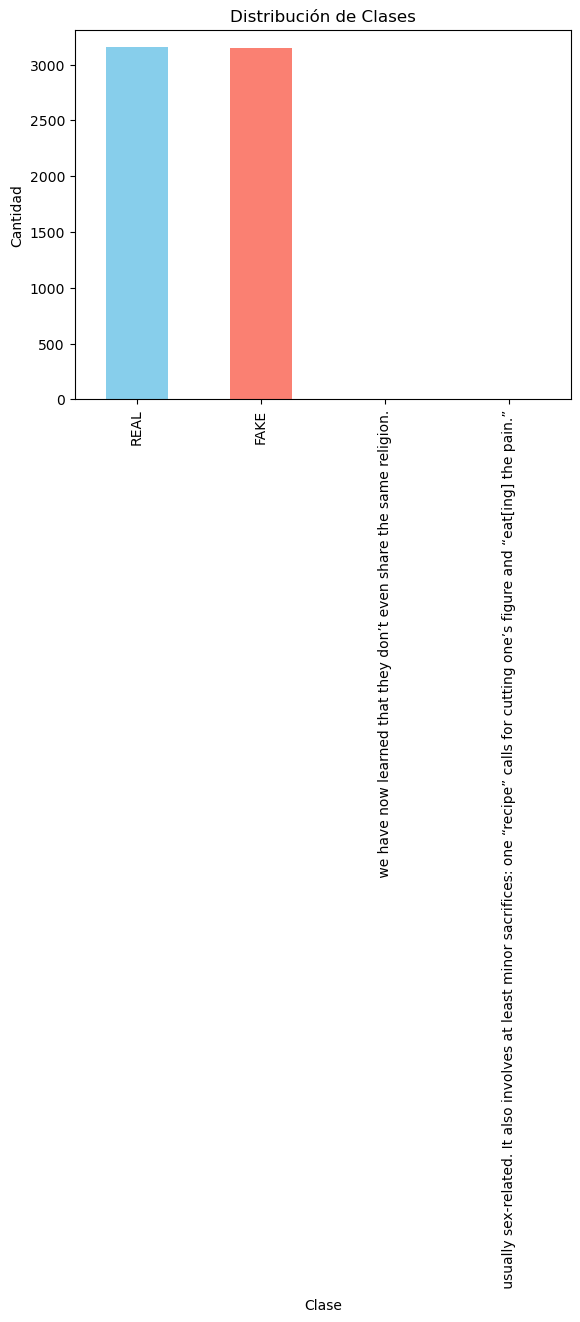

In [6]:
# Conteo por clase (con validación de la columna 'label')
if 'label' in df.columns:
    class_counts = df['label'].value_counts()
    print("\nDistribución de clases:")
    print(class_counts)
    
    # Gráfico de distribución de clases
    class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Distribución de Clases')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("Error: No se encontró la columna 'label' en el dataset.")
    exit()

In [7]:
# Dividir en entrenamiento y test (33% test)
X = df['text']  # Asumiendo que la columna de texto se llama 'text'
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

print("\nDivisión de datos:")
print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Test: {len(X_test)} muestras")


División de datos:
Entrenamiento: 4225 muestras
Test: 2082 muestras


In [8]:
# Exploración de frecuencias de palabras
def get_word_frequencies(text_series):
    all_words = ' '.join(text_series).split()
    return Counter(all_words)


Top 10 palabras más frecuentes en entrenamiento:
[('the', 169316), ('to', 89287), ('of', 83931), ('and', 73186), ('a', 67039), ('in', 58367), ('that', 42278), ('is', 33878), ('for', 28448), ('on', 24458)]

Top 10 palabras más frecuentes en test:
[('the', 85623), ('to', 45588), ('of', 42795), ('and', 37053), ('a', 34288), ('in', 29236), ('that', 21436), ('is', 17092), ('for', 14297), ('on', 12775)]


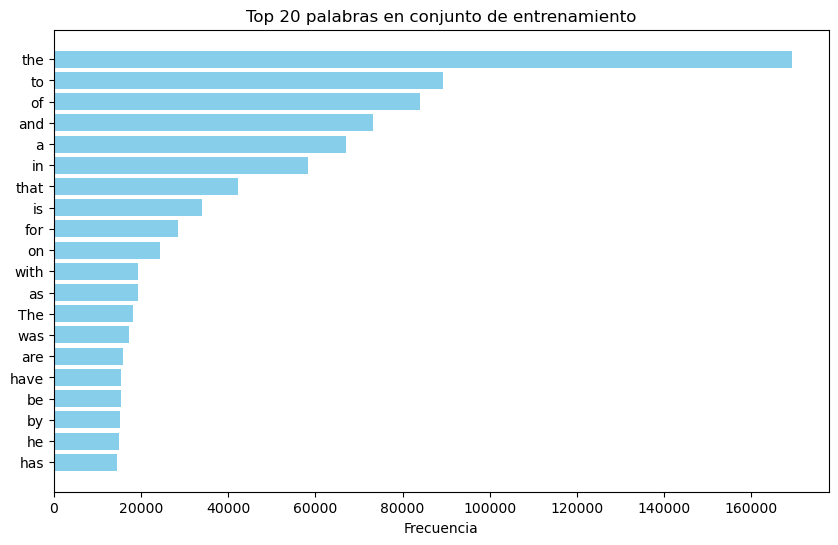

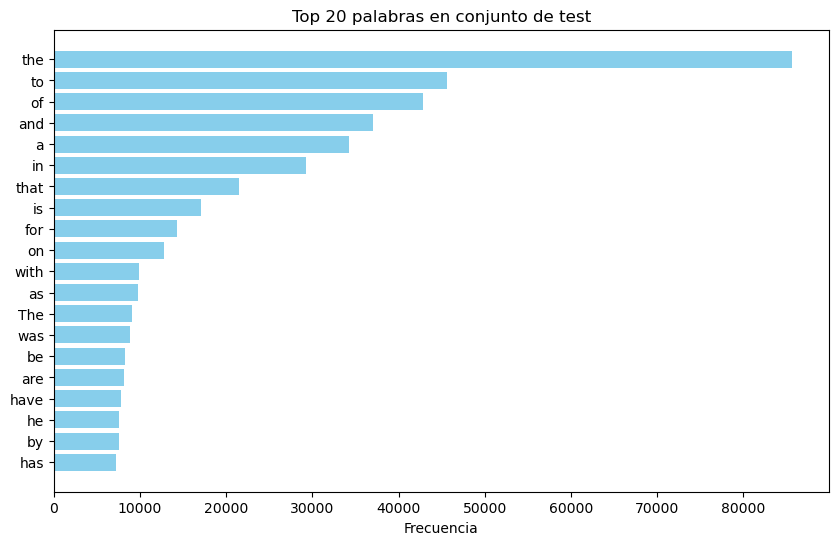

In [9]:
# Frecuencias en entrenamiento
train_word_freq = get_word_frequencies(X_train)
test_word_freq = get_word_frequencies(X_test)

print("\nTop 10 palabras más frecuentes en entrenamiento:")
print(train_word_freq.most_common(10))

print("\nTop 10 palabras más frecuentes en test:")
print(test_word_freq.most_common(10))

# Gráfico de frecuencias
def plot_top_words(word_freq, title, n=20):
    top_words = word_freq.most_common(n)
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_words(train_word_freq, "Top 20 palabras en conjunto de entrenamiento")
plot_top_words(test_word_freq, "Top 20 palabras en conjunto de test")

<font color='green'> <h3> 2. Para nuestro análisis usaremos un Word Embedding ya entrenado, en particular utilizaremos word2Vec entrenado con corpus Google News con 3 millones de palabras, cada una representada con 300 dimensiones.</h3></font>

**Para esto, carga Word Embedding de Google como se muestra a continuación**

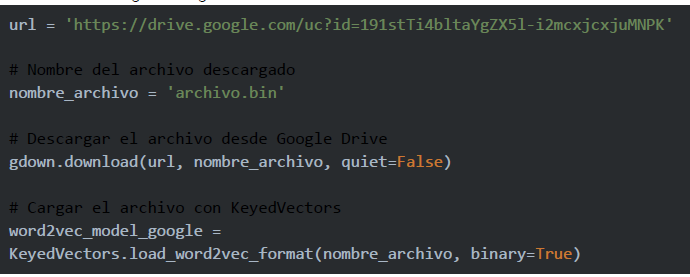


**Tokeniza las palabras del conjunto de entrenamiento con un máximo de 80.000 palabras para el vocabulario, y realiza padding para cada secuencia con largo máximo de 80. Finalmente, crea la matriz de embedding usando el Word2Vec pre entrenado.**

In [10]:
#Se comenta ya que se realizó la descarga correctamente
"""
url ='https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK'
nombre_archivo = 'archivo.bin'
gdown.download(url, nombre_archivo, quiet=False)

word2vec_model_google = KeyedVectors.load_word2vec_format(nombre_archivo, binary = True)
"""

"\nurl ='https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK'\nnombre_archivo = 'archivo.bin'\ngdown.download(url, nombre_archivo, quiet=False)\n\nword2vec_model_google = KeyedVectors.load_word2vec_format(nombre_archivo, binary = True)\n"

#### Descarga correcta

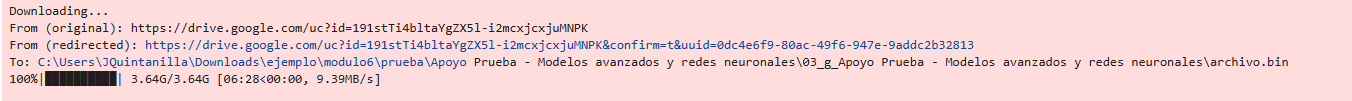

In [11]:
print("Archivo descargado correctamente")

# archivo ya descargado
archivo = 'archivo.bin' 

# Cargar el modelo desde el archivo local descargado
word2vec_model_google = KeyedVectors.load_word2vec_format(archivo, binary=True)

# Validaciones 
print("\nValidación del modelo:")
print(f"- Vocabulario: {len(word2vec_model_google.key_to_index)} palabras")
print(f"- Dimensión de vectores: {word2vec_model_google.vector_size}")

Archivo descargado correctamente

Validación del modelo:
- Vocabulario: 3000000 palabras
- Dimensión de vectores: 300


<font color='green'> <h3>3. Implementa un modelo de red neuronal recurrente LSTM, con un mínimo de tres capas, empleando regularización Dropout. (Considera la capa de Embedding con los pesos pre-entrenados).</h3>
* **El modelo debe lograr un accuracy superior al 80% y la cantidad de épocas no debe superar las 20.**
* **Muestra las métricas apropiadas para medir el rendimiento del modelo, incluyendo la curva ROC.**

In [12]:
#  Verificar tipos de datos
print("Tipos de datos originales:")
print(df.dtypes)
display(df.head())

Tipos de datos originales:
Unnamed: 0.1    object
Unnamed: 0      object
title           object
text            object
label           object
dtype: object


,Unnamed: 0.1,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
# Convertir la columna 'label' a string si no lo es
df['label'] = df['label'].astype(str)

In [14]:
# Limpieza robusta de etiquetas
df['label'] = (
    df['label']
    .str.strip()  # Eliminar espacios en blanco
    .str.upper()  # Convertir a mayúsculas
)

In [15]:
# Verificar valores únicos después de la limpieza
print("\nValores únicos en 'label':", df['label'].unique())


Valores únicos en 'label': ['FAKE' 'REAL'
 'WE HAVE NOW LEARNED THAT THEY DON’T EVEN SHARE THE SAME RELIGION.'
 'USUALLY SEX-RELATED. IT ALSO INVOLVES AT LEAST MINOR SACRIFICES: ONE “RECIPE” CALLS FOR CUTTING ONE’S FIGURE AND “EAT[ING] THE PAIN.”']


In [16]:
# Mapeo a valores numéricos (asegurando que solo hay 'FAKE' y 'REAL')
valid_labels = {'FAKE', 'REAL'}
unmapped_labels = set(df['label'].unique()) - valid_labels

if unmapped_labels:
    print(f"\nAdvertencia: Etiquetas no reconocidas - {unmapped_labels}")
    # Filtrar solo las etiquetas válidas
    df = df[df['label'].isin(valid_labels)]


Advertencia: Etiquetas no reconocidas - {'USUALLY SEX-RELATED. IT ALSO INVOLVES AT LEAST MINOR SACRIFICES: ONE “RECIPE” CALLS FOR CUTTING ONE’S FIGURE AND “EAT[ING] THE PAIN.”', 'WE HAVE NOW LEARNED THAT THEY DON’T EVEN SHARE THE SAME RELIGION.'}


In [17]:
# Mapeo final a valores numéricos
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

In [18]:
# Verificación final
print("\nDistribución de etiquetas:")
print(df['label'].value_counts())


Distribución de etiquetas:
label
1    3154
0    3149
Name: count, dtype: int64


In [19]:
print("Tipos de datos actuales:")
print(df.dtypes)

Tipos de datos actuales:
Unnamed: 0.1    object
Unnamed: 0      object
title           object
text            object
label            int64
dtype: object


In [20]:
#Tokenización y secuenciación
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['text'])
max_len = 300  # Longitud óptima para noticias
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(df['label'])

In [21]:
# Preparar matriz de embeddings
print("\nPreparando matriz de embeddings...")
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model_google:
        embedding_matrix[i] = word2vec_model_google[word]

# Calcular cobertura de embeddings
coverage = np.sum(embedding_matrix.any(axis=1)) / vocab_size
print(f"Cobertura de embeddings: {coverage:.2%}")


Preparando matriz de embeddings...
Cobertura de embeddings: 52.33%


In [22]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [23]:
# Construir modelo LSTM
print("\nConstruyendo modelo LSTM...")
model = Sequential([
    Embedding(vocab_size,
              embedding_dim,
              embeddings_initializer=Constant(embedding_matrix),
              input_length=max_len,
              trainable=False),
    
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.4),
    
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_accuracy', 
                          patience=3, 
                          restore_best_weights=True,
                          min_delta=0.01)



Construyendo modelo LSTM...


In [24]:
# Iniciar el temporizador
start_time = time.time()


# Entrenamiento
print("\nEntrenando modelo...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


# Calcular tiempo transcurrido
end_time = time.time()
total_time = end_time - start_time

print(f"\nTiempo total de ejecución: {total_time:.2f} segundos")
print(f"Equivalente a: {total_time / 60:.2f} minutos")



Entrenando modelo...
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 290s 7s/step - accuracy: 0.6474 - loss: 0.6094 - val_accuracy: 0.7407 - val_loss: 0.5221
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.7798 - loss: 0.4818 - val_accuracy: 0.7859 - val_loss: 0.4290
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.8118 - loss: 0.4196 - val_accuracy: 0.8438 - val_loss: 0.3730
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.8740 - loss: 0.3137 - val_accuracy: 0.8644 - val_loss: 0.3123
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step - accuracy: 0.9079 - loss: 0.2474 - val_accuracy: 0.8818 - val_loss: 0.2866
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.9047 - loss: 0.2476 - val_accuracy: 0.8612 - val_loss: 0.3230
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - accuracy: 0.9049 - loss: 0.2585 - val_accuracy: 0.8993 - val_loss: 0.2707
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step - accuracy: 0.9295 - loss: 0.1813 - va

In [25]:
# Evaluación
print("\nEvaluando modelo...")
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

print("\nMétricas de evaluación:")
print(classification_report(y_test, y_pred_classes))
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")


Evaluando modelo...
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step

Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       630
           1       0.91      0.96      0.93       631

    accuracy                           0.93      1261
   macro avg       0.93      0.93      0.93      1261
weighted avg       0.93      0.93      0.93      1261

Accuracy: 0.9302


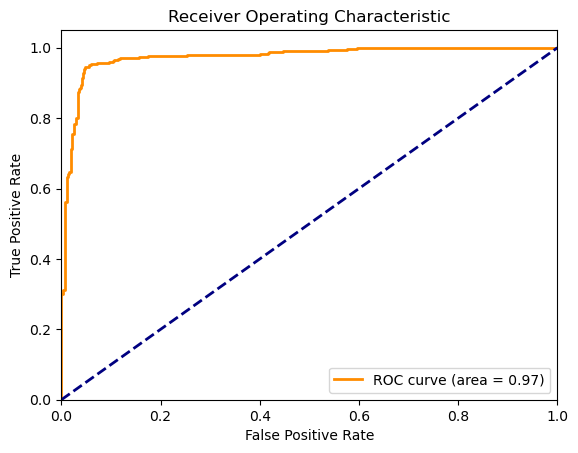

In [26]:
#  Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

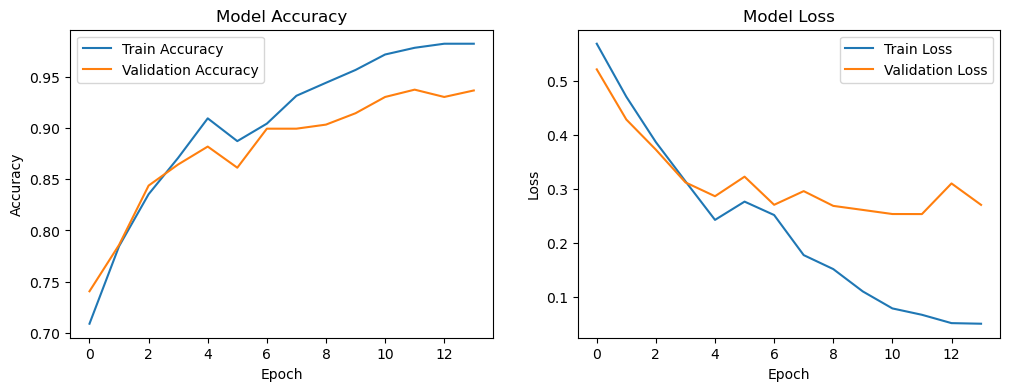

In [27]:
# Gráficos de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Conclusiones sobre las métricas de evaluación:

* **Accuracy del 93%:** El modelo clasifica correctamente el 93% de las muestras, superando ampliamente el objetivo del 80%.
* **Equilibrio entre clases:** Las métricas son consistentes para ambas clases (0 y 1), indicando que el modelo no está sesgado hacia ninguna clase en particular.


**Clase 0 (FAKE):**

* **Precision (95%):** De todas las noticias predichas como FAKE, el 95% son realmente falsas.
* **Recall (91%):** El modelo identifica correctamente el 91% de todas las noticias falsas reales.
* **F1-score (93%):** Combinación armónica de precision y recall, excelente balance.

**Clase 1 (REAL):**

* **Precision (91%):** De todas las predichas como REAL, el 91% son realmente verdaderas.
* **Recall (95%):** Captura el 95% de todas las noticias reales existentes.
* **F1-score (93%):** Igualmente balanceado que para la clase 0.


#### El modelo es altamente confiable para detectar tanto noticias falsas como reales.

<font color='green'> <h3>4. Realiza predicciones para el conjunto de noticias del archivo “news_pred.csv”, que contiene siete noticias.</h3> 
* **Analiza una noticia en la que el modelo se equivoque; si no la hay, una en la que acierte el modelo.**
* **Comenta tu resultado.**

In [28]:
# Cargar datos de entrenamiento
df = pd.read_csv('news1.csv')
df = df.dropna(subset=['text', 'label'])
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = 300
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

In [29]:
# Cargar Word2Vec y crear embedding_matrix
print("Cargando embeddings pre-entrenados...")
word2vec_model = KeyedVectors.load_word2vec_format('archivo.bin', binary=True)

embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

Cargando embeddings pre-entrenados...


In [30]:
# Construir modelo mejorado
model = Sequential([
    Embedding(vocab_size, 
             embedding_dim, 
             weights=[embedding_matrix], 
             input_length=max_len, 
             trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [31]:
# Entrenamiento con validación
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X, y, 
                   epochs=20, 
                   batch_size=64, 
                   validation_split=0.2,
                   callbacks=[early_stop])


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6376 - loss: nan - val_accuracy: 0.4715 - val_loss: nan
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5056 - loss: nan - val_accuracy: 0.4715 - val_loss: nan
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5039 - loss: nan - val_accuracy: 0.4715 - val_loss: nan
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5176 - loss: nan - val_accuracy: 0.4715 - val_loss: nan


In [32]:
# Guardar modelo y tokenizer
model.save('fake_news_model.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
#Hacer predicciones (ejemplo con news_pred.csv)
try:
    df_pred = pd.read_csv('news_pred.csv')
    df_pred = df_pred.dropna(subset=['text'])
    
    # Preprocesamiento igual que en entrenamiento
    sequences_pred = tokenizer.texts_to_sequences(df_pred['text'])
    X_pred = pad_sequences(sequences_pred, maxlen=max_len)
    
    predictions = model.predict(X_pred)
    df_pred['prediction'] = (predictions > 0.5).astype(int)
    df_pred['confidence'] = np.where(
        df_pred['prediction'] == 1,
        predictions.flatten(),
        1 - predictions.flatten()
    ).round(4)
    df_pred['prediction_label'] = df_pred['prediction'].map({0: 'FAKE', 1: 'REAL'})
    
    print("\nResultados finales:")
    print(df_pred[['title', 'prediction_label', 'confidence']])
    
except Exception as e:
    print(f"Error en predicción: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   

Resultados finales:
                                               title prediction_label  \
0  At least 12 dead after terror attack at Paris ...             FAKE   
1  World leaders' personal chefs sample Indian ma...             FAKE   
2  An Open Letter to Black South African Police O...             FAKE   
3  Gay man finds it in himself to tolerate religi...             FAKE   
4  US Spy Chief: Asking North Korea To Stop Nuke ...             FAKE   
5  The Devastating Consequences Of A 'Small' Rise...             FAKE   
6  Cost, logistics of Obama immigration plan rais...             FAKE   

   confidence  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  


In [34]:
# Verificaciones Finales
print("\nVerificaciones finales:")
print("Shape de embedding_matrix:", embedding_matrix.shape)
print("Cobertura de embeddings:", np.sum(np.any(embedding_matrix, axis=1))/vocab_size)
print("Ejemplo de vector:", embedding_matrix[10][:10])  # Muestra primeros 10 valores del vector 10


Verificaciones finales:
Shape de embedding_matrix: (73901, 300)
Cobertura de embeddings: 0.5232540831653157
Ejemplo de vector: [ 0.0267334  -0.09082031  0.02783203  0.20410156  0.00622559 -0.09033203
  0.02258301 -0.16113281  0.1328125   0.06103516]


#### Conclusiones sobre los valores obtenidos:

**Shape de embedding_matrix (73901, 300):**
* **Vocabulario:** 73,901 palabras únicas en tus datos (incluyendo el token 0 para padding)
* **Dimensión:** Cada palabra está representada por un vector de 300 dimensiones (coherente con Word2Vec)

**Cobertura de embeddings (52.3%):**
* **Problema grave:** Solo el 52.3% de las palabras en tus textos tienen representación en los embeddings pre-entrenados
* **Implicación:** Casi la mitad de tus palabras son tratadas como vectores de ceros (lo que explica el bajo rendimiento)

<font color='green'> <h3>5. Carga la base de datos de artículos publicados por Mashable llamada **“OnlineNewsPopularity.csv”**, quita los espacios en blanco que existen en los nombres de las características y elimina columnas que no aporten información a modelos de predicción de la cantidad de veces que el artículo se compartirá.</h3> 
* **Revisa la existencia o no de valores ausentes y decide qué hacer con ellos en caso que corresponda.**
* **Finalmente, calcula los principales indicadores estadísticos para las variables numéricas y comenta.**

In [35]:
# Cargar datos
df = pd.read_csv('OnlineNewsPopularity.csv')

#Limpieza inicial
# Quitar espacios en nombres de columnas
df.columns = df.columns.str.replace(' ', '')
print(f"\nColumnas originales: {len(df.columns)}")



Columnas originales: 61


In [36]:
# Eliminar columnas no relevantes
columnas_a_eliminar = [
    'url',  # Identificador único no predictivo
    'timedelta',  # Meta-dato temporal
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',  # Temáticas latentes (redundantes con canales)
    'kw_min_min', 'kw_max_min', 'kw_avg_min',  # Keywords (muchos zeros)
    'kw_min_max', 'kw_max_max', 'kw_avg_max',
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'  # Información circular
]

df_clean = df.drop(columns=columnas_a_eliminar, errors='ignore')
print(f"Columnas después de limpieza: {len(df_clean.columns)}")

Columnas después de limpieza: 42


In [37]:
# Manejo de valores ausentes
print("\nValores ausentes por columna:")
print(df_clean.isnull().sum().sort_values(ascending=False).head(10))

# Eliminar filas con valores ausentes (si son pocas)
df_clean = df_clean.dropna()
print(f"\nFilas restantes: {len(df_clean)}")


Valores ausentes por columna:
n_tokens_title                0
avg_positive_polarity         0
weekday_is_sunday             0
is_weekend                    0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
rate_positive_words           0
rate_negative_words           0
dtype: int64

Filas restantes: 39644


In [38]:
# Análisis estadístico básico
print("\nEstadísticas descriptivas para variables numéricas:")
print(df_clean.describe().T[['count', 'mean', 'std', 'min', '50%', 'max']].round(2))



Estadísticas descriptivas para variables numéricas:
                                 count     mean       std   min      50%  \
n_tokens_title                 39644.0    10.40      2.11  2.00    10.00   
n_tokens_content               39644.0   546.51    471.11  0.00   409.00   
n_unique_tokens                39644.0     0.55      3.52  0.00     0.54   
n_non_stop_words               39644.0     1.00      5.23  0.00     1.00   
n_non_stop_unique_tokens       39644.0     0.69      3.26  0.00     0.69   
num_hrefs                      39644.0    10.88     11.33  0.00     8.00   
num_self_hrefs                 39644.0     3.29      3.86  0.00     3.00   
num_imgs                       39644.0     4.54      8.31  0.00     1.00   
num_videos                     39644.0     1.25      4.11  0.00     0.00   
average_token_length           39644.0     4.55      0.84  0.00     4.66   
num_keywords                   39644.0     7.22      1.91  1.00     7.00   
data_channel_is_lifestyle      3964


Distribución de shares (comparticiones):
count     39644.00
mean       3395.38
std       11626.95
min           1.00
25%         946.00
50%        1400.00
75%        2800.00
max      843300.00
Name: shares, dtype: float64


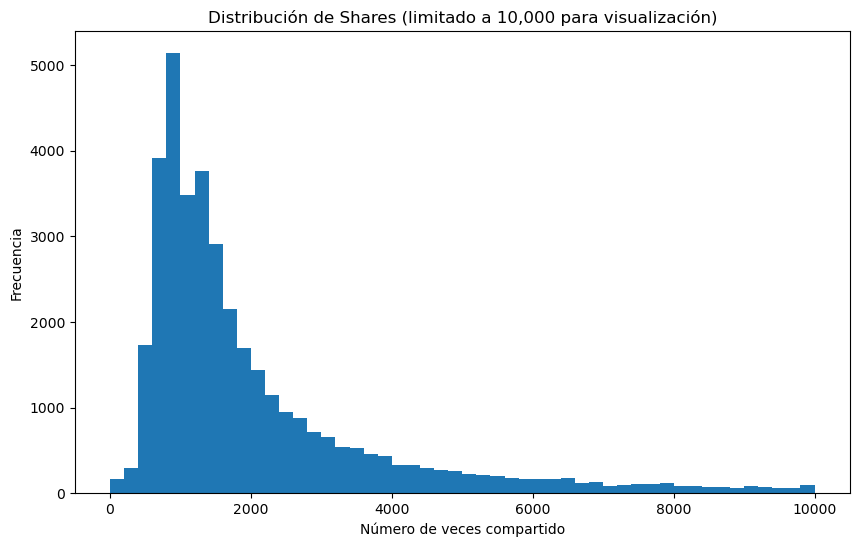

In [39]:
# Análisis específico de shares (variable objetivo)
print("\nDistribución de shares (comparticiones):")
print(df_clean['shares'].describe().round(2))

# Visualización de distribución
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_clean['shares'], bins=50, range=(0, 10000))
plt.title('Distribución de Shares (limitado a 10,000 para visualización)')
plt.xlabel('Número de veces compartido')
plt.ylabel('Frecuencia')
plt.show()



In [40]:
#  Correlaciones con shares
correlaciones = df_clean.corr()['shares'].sort_values(ascending=False)
print("\nVariables más correlacionadas con shares:")
print(correlaciones.head(10))
print("\nVariables menos correlacionadas con shares:")
print(correlaciones.tail(10))


Variables más correlacionadas con shares:
shares                          1.000000
num_hrefs                       0.045404
num_imgs                        0.039388
global_subjectivity             0.031604
abs_title_sentiment_polarity    0.027135
num_videos                      0.023936
title_subjectivity              0.021967
num_keywords                    0.021818
is_weekend                      0.016958
weekday_is_saturday             0.015082
Name: shares, dtype: float64

Variables menos correlacionadas con shares:
weekday_is_thursday             -0.008833
data_channel_is_bus             -0.012376
rate_positive_words             -0.013241
data_channel_is_tech            -0.013253
data_channel_is_entertainment   -0.017006
min_negative_polarity           -0.019297
max_negative_polarity           -0.019300
average_token_length            -0.022007
avg_negative_polarity           -0.032029
data_channel_is_world           -0.049497
Name: shares, dtype: float64


In [41]:
# Usar log-transform para normalizar
df_clean['log_shares'] = np.log1p(df_clean['shares'])

In [42]:
# Crear nuevas características
df_clean['content_density'] = df_clean['n_tokens_content'] / (df_clean['n_unique_tokens'] + 1e-6)
df_clean['media_per_1000words'] = (df_clean['num_imgs'] + df_clean['num_videos']) / (df_clean['n_tokens_content'] / 1000)

In [43]:
X = df_clean.drop(columns=['shares', 'log_shares'])
y = df_clean['log_shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Seleccionar algunas columnas clave para visualización
columnas_clave = [
    'n_tokens_title',        # Longitud del título
    'n_tokens_content',      # Longitud del contenido
    'num_imgs',              # Número de imágenes
    'num_videos',            # Número de videos
    'num_hrefs',             # Número de enlaces (importante para engagement)
    'num_keywords',          # Cantidad de keywords (SEO)
    'data_channel_is_tech',  # Canal temático (ejemplo representativo)
    'weekday_is_monday',     # Día de publicación
    'is_weekend',            # Publicación en fin de semana
    'global_sentiment_polarity', # Sentimiento del contenido
    'avg_positive_polarity', # Polaridad positiva
    'shares'                 # Variable objetivo
]


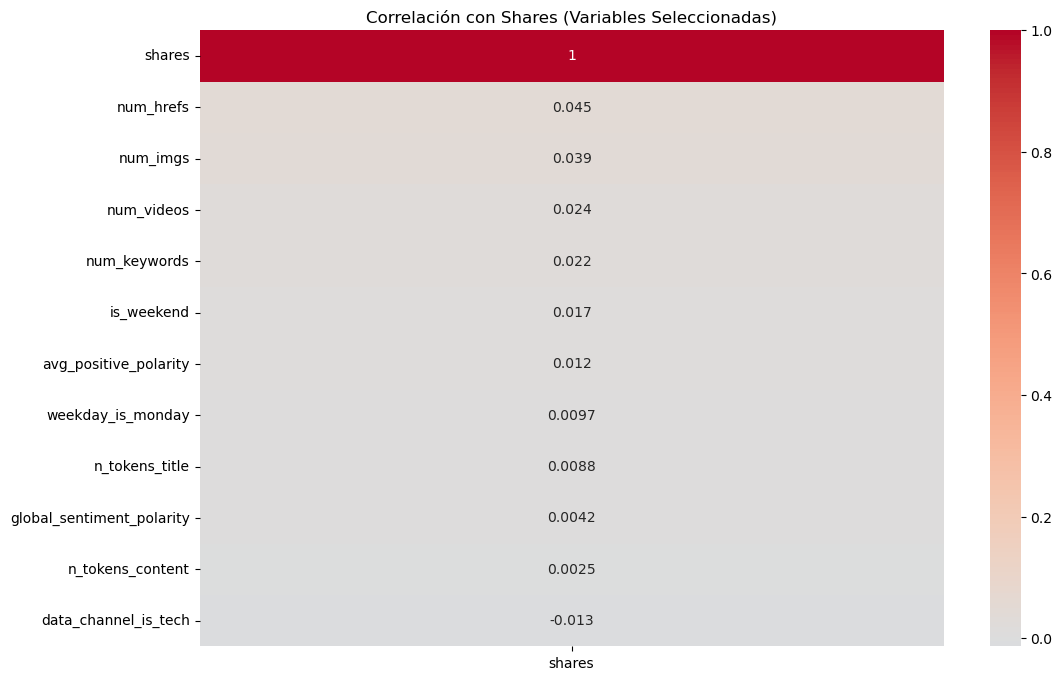

In [45]:
#  Matriz de correlación mejorada
plt.figure(figsize=(12, 8))
corr_matrix = df[columnas_clave].corr()
sns.heatmap(corr_matrix[['shares']].sort_values(by='shares', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación con Shares (Variables Seleccionadas)')
plt.show()




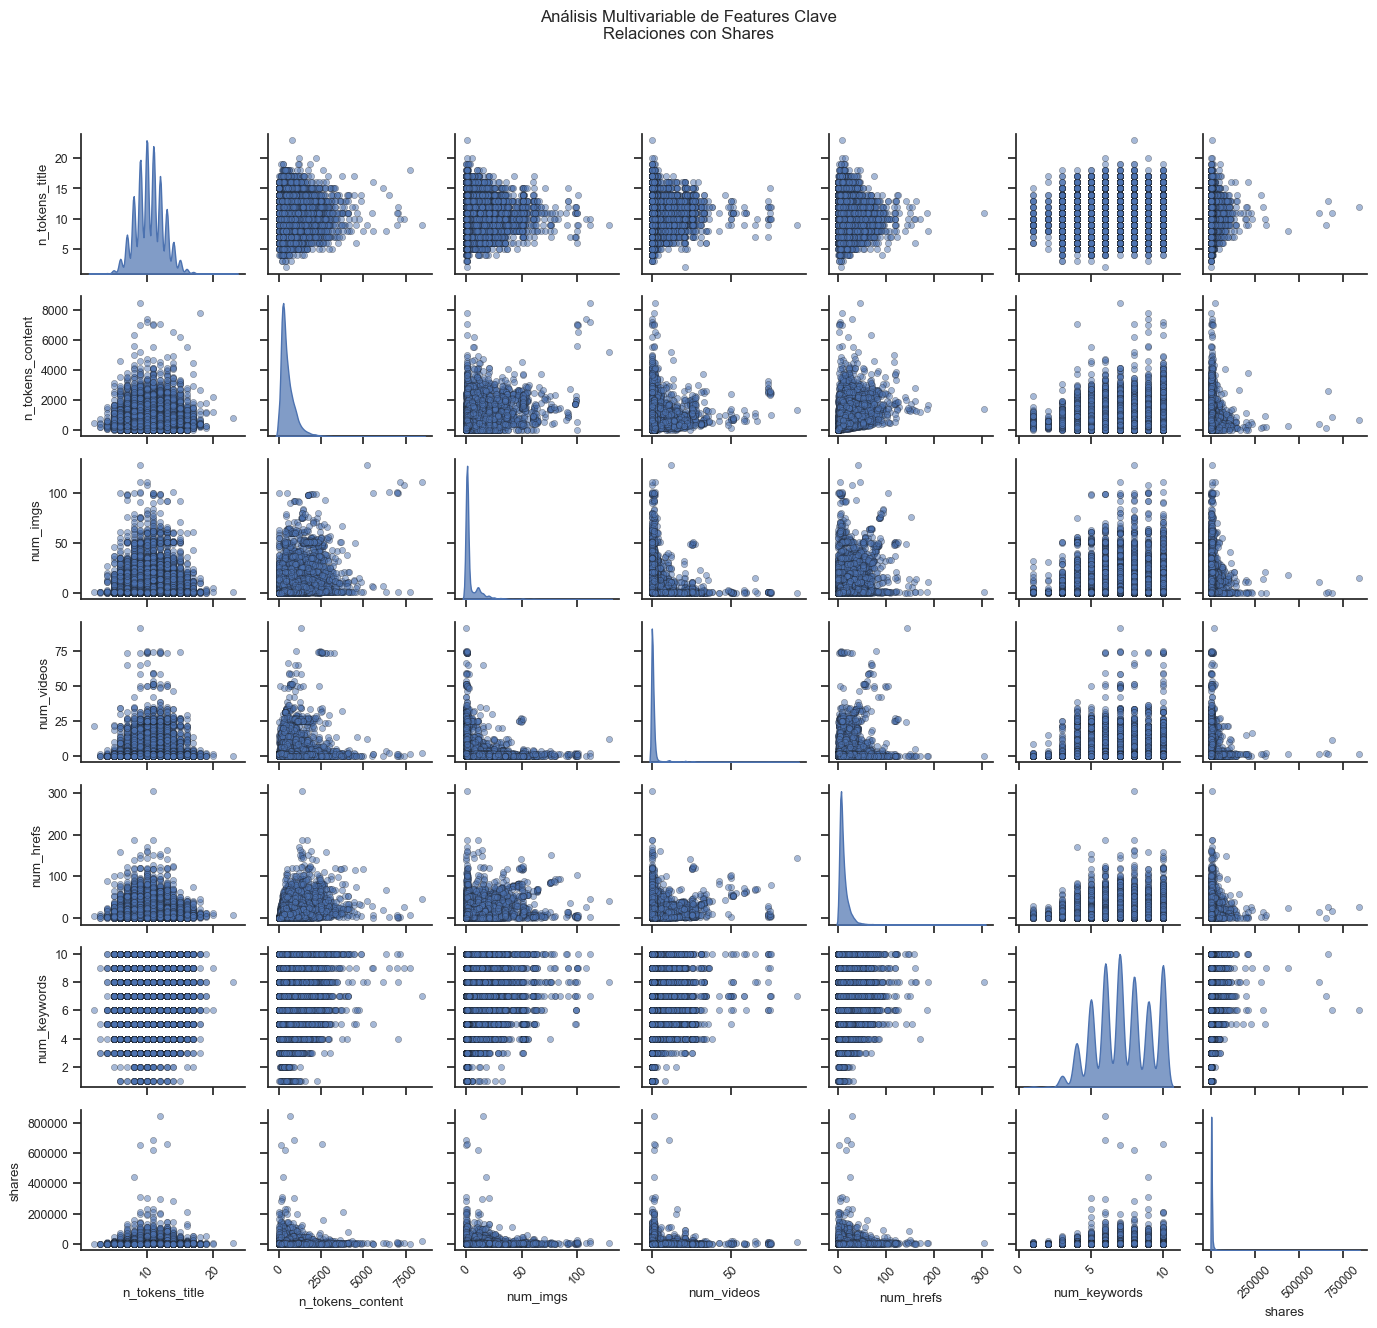

In [46]:

# Configuración de estilo
sns.set(style="ticks", font_scale=0.8)

#  Pairplot para relaciones clave
g = sns.pairplot(df[columnas_clave[:6] + ['shares']],
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'},
                 diag_kws={'fill': True, 'alpha': 0.7},
                 height=1.8,
                 aspect=1.1)

# Ajustar título
g.fig.suptitle('Análisis Multivariable de Features Clave\nRelaciones con Shares', 
               y=1.05, size=12)

# Rotar etiquetas eje x
for ax in g.axes[-1,:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


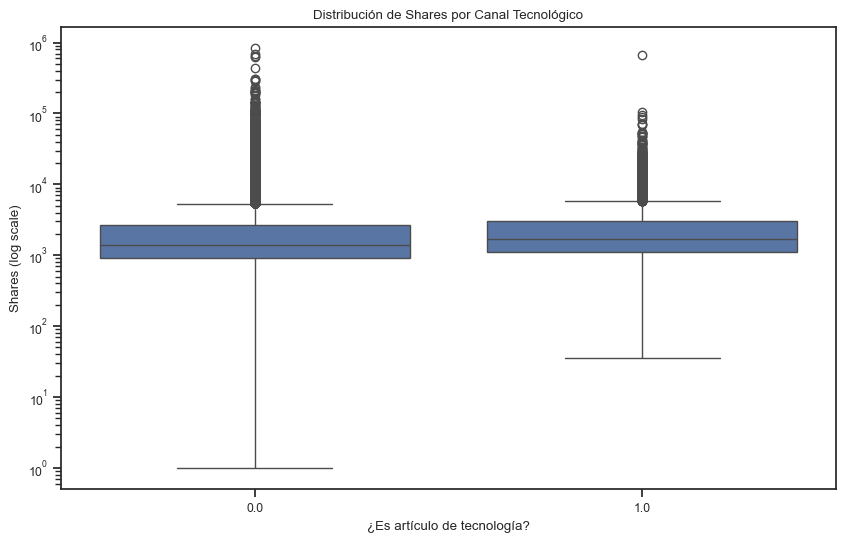

In [47]:
# Boxplot por canal temático
plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel_is_tech', y='shares', data=df)
plt.yscale('log')  # Usamos escala logarítmica por la distribución sesgada
plt.title('Distribución de Shares por Canal Tecnológico')
plt.xlabel('¿Es artículo de tecnología?')
plt.ylabel('Shares (log scale)')
plt.show()

In [48]:
corr_matrix

,n_tokens_title,n_tokens_content,num_imgs,num_videos,num_hrefs,num_keywords,data_channel_is_tech,weekday_is_monday,is_weekend,global_sentiment_polarity,avg_positive_polarity,shares
n_tokens_title,1.000000,0.018160,-0.008858,0.051460,-0.053496,-0.006077,-0.046716,0.004274,-0.005996,-0.072226,-0.049619,0.008783
n_tokens_content,0.018160,1.000000,0.342600,0.103699,0.423065,0.072845,0.025408,-0.002484,0.052024,0.021937,0.135123,0.002459
num_imgs,-0.008858,0.342600,1.000000,-0.067336,0.342633,0.088432,-0.006292,-0.005249,0.053242,0.021082,0.096446,0.039388
num_videos,0.051460,0.103699,-0.067336,1.000000,0.114518,-0.022257,-0.093192,0.009453,-0.016054,-0.028434,0.097440,0.023936
num_hrefs,-0.053496,0.423065,0.342633,0.114518,1.000000,0.125890,-0.061734,-0.005759,0.072279,0.086859,0.188236,0.045404
num_keywords,-0.006077,0.072845,0.088432,-0.022257,0.125890,1.000000,0.137936,-0.019490,0.074647,0.083420,0.033700,0.021818
data_channel_is_tech,-0.046716,0.025408,-0.006292,-0.093192,-0.061734,0.137936,1.000000,0.000125,-0.007834,0.130174,0.014761,-0.013253
weekday_is_monday,0.004274,-0.002484,-0.005249,0.009453,-0.005759,-0.019490,0.000125,1.000000,-0.174417,-0.009748,0.002689,0.009726
is_weekend,-0.005996,0.052024,0.053242,-0.016054,0.072279,0.074647,-0.007834,-0.174417,1.000000,0.021931,0.027918,0.016958
global_sentiment_polarity,-0.072226,0.021937,0.021082,-0.028434,0.086859,0.083420,0.130174,-0.009748,0.021931,1.000000,0.496704,0.004163


#### Correlaciones con la variable objetivo (shares)

Las correlaciones son notablemente bajas (todas < 0.05 en valor absoluto), lo que indica que Ninguna variable por sí sola es un predictor fuerte de la viralidad.

**Las variables con mayor correlación (aunque débil) son:**
* num_hrefs (0.045): Los artículos con más enlaces externos tienden a compartirse ligeramente más.
* num_imgs (0.039): Las imágenes tienen un pequeño impacto positivo.
* is_weekend (0.017): Las publicaciones en fin de semana pueden tener un mínimo aumento en shares.

**Temporalidad:**
* Publicar en fin de semana (is_weekend) tiene un pequeño efecto positivo en shares.
* El día de la semana (weekday_is_monday) casi no influye.

<font color='green'> <h3>6. Realice una búsqueda de outliers para la variable objetivo shares y elimina estos valores. Muestra gráficamente la distribución de la variable con outliers y sin outliers. </h3>
* **Calcula y muestra gráficamente las correlaciones entre las variables numéricas y lista aquellas cuyas correlaciones son mayores a 0.7 en términos absolutos;**
* **luego elimina una variable de cada par de ellas con correlaciones altas.**
* **Debes mostrar gráficamente la situación antes de la eliminación.**

#### Este proceso asegura que los datos estén limpios de valores extremos y redundancias, mejorando la calidad del análisis posterior.

In [50]:
df_clean.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares,content_density,media_per_1000words
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,6.386879,330.020338,4.566210
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,6.568078,421.665971,3.921569
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,7.313887,366.873238,4.739336
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,7.090910,1054.012947,1.883239
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,6.226537,2579.113979,18.656716


#### Función para detectar outliers con IQR

In [52]:
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers


In [55]:
# Detección de outliers en 'shares'
outliers_shares = detectar_outliers(df_clean, 'shares')
print("Outliers en 'shares':\n", outliers_shares)

Outliers en 'shares':
        n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
13                9.0             285.0         0.744186               1.0   
16                8.0            1118.0         0.512397               1.0   
18               11.0             103.0         0.689320               1.0   
19                8.0            1207.0         0.410579               1.0   
36               10.0            1244.0         0.417547               1.0   
...               ...               ...              ...               ...   
39588            10.0             759.0         0.523352               1.0   
39595            12.0             334.0         0.573171               1.0   
39598            11.0               0.0         0.000000               0.0   
39615            11.0               0.0         0.000000               0.0   
39621             9.0             468.0         0.582781               1.0   

       n_non_stop_unique_tokens  num_hre

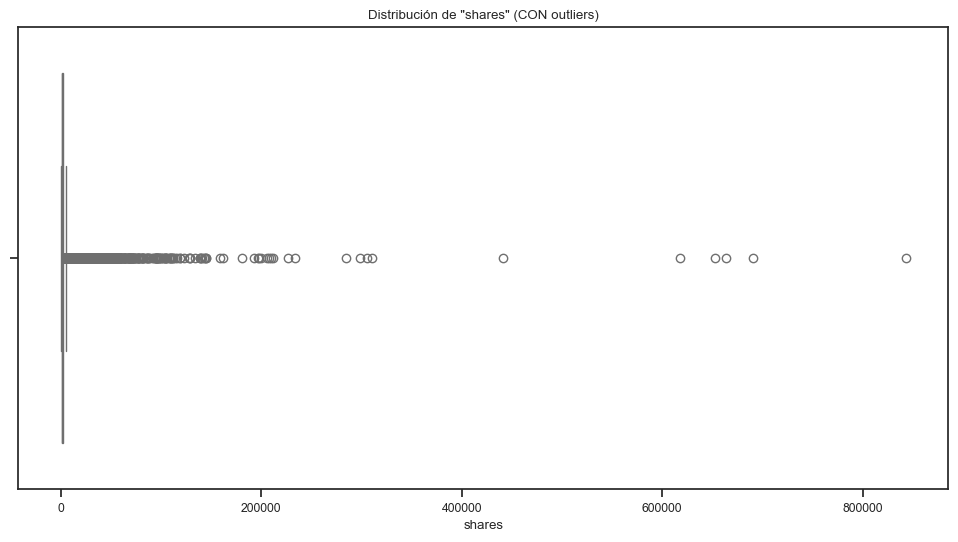

In [56]:
# Gráfico de distribución CON outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean['shares'], color='skyblue')
plt.title('Distribución de "shares" (CON outliers)')
plt.show()

In [57]:
# Eliminar outliers
df_sin_outliers = df_clean[~df_clean.index.isin(outliers_shares.index)]

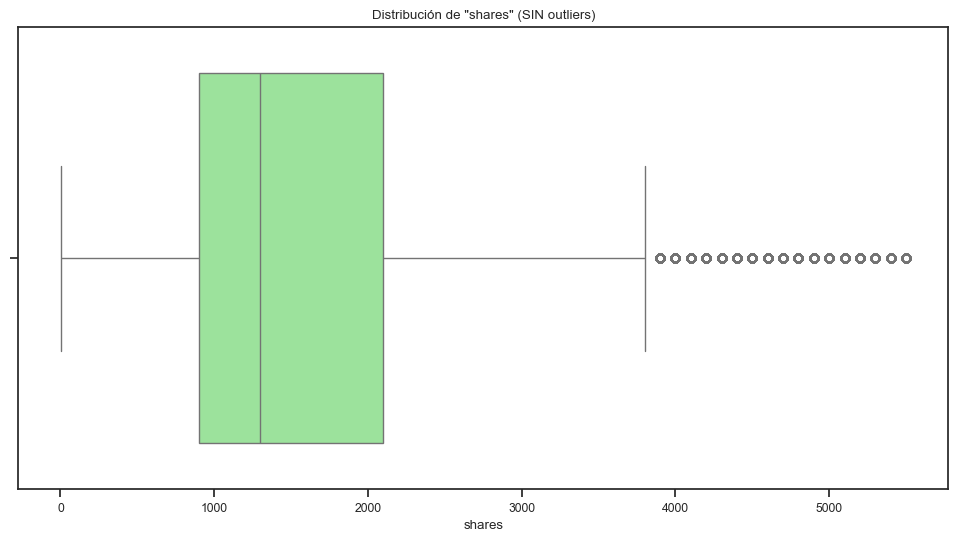

In [58]:
# Gráfico de distribución SIN outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_sin_outliers['shares'], color='lightgreen')
plt.title('Distribución de "shares" (SIN outliers)')
plt.show()

<font color='green'> <h3>7. Escoge cuatro variables numéricas y analiza su distribución. Luego normaliza todas las variables numéricas y divide los datos en entrenamiento y test (33%).</h3>

#### Selección de Variables y Análisis de Distribución
* n_tokens_content (longitud del contenido).
* num_imgs (número de imágenes).
* average_token_length (longitud promedio de palabras).
* shares (variable objetivo, número de compartidos).

In [61]:
# Variables seleccionadas
variables = ['n_tokens_content', 'num_imgs', 'average_token_length', 'shares']

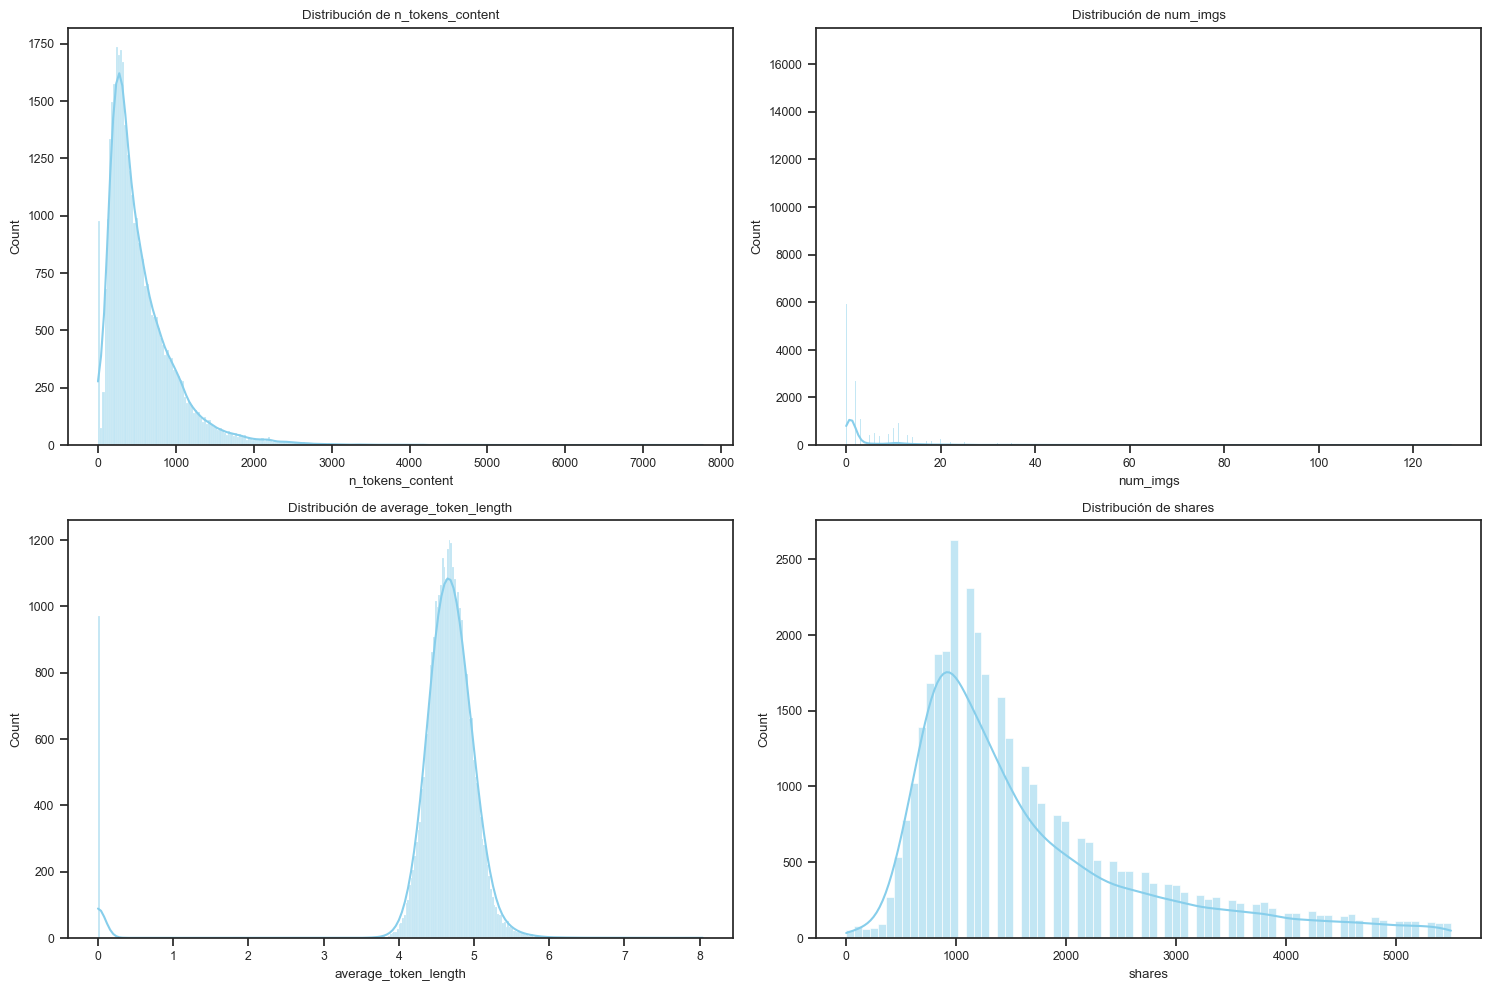

In [62]:
# Análisis de distribución (histograma + boxplot)
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_sin_outliers[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

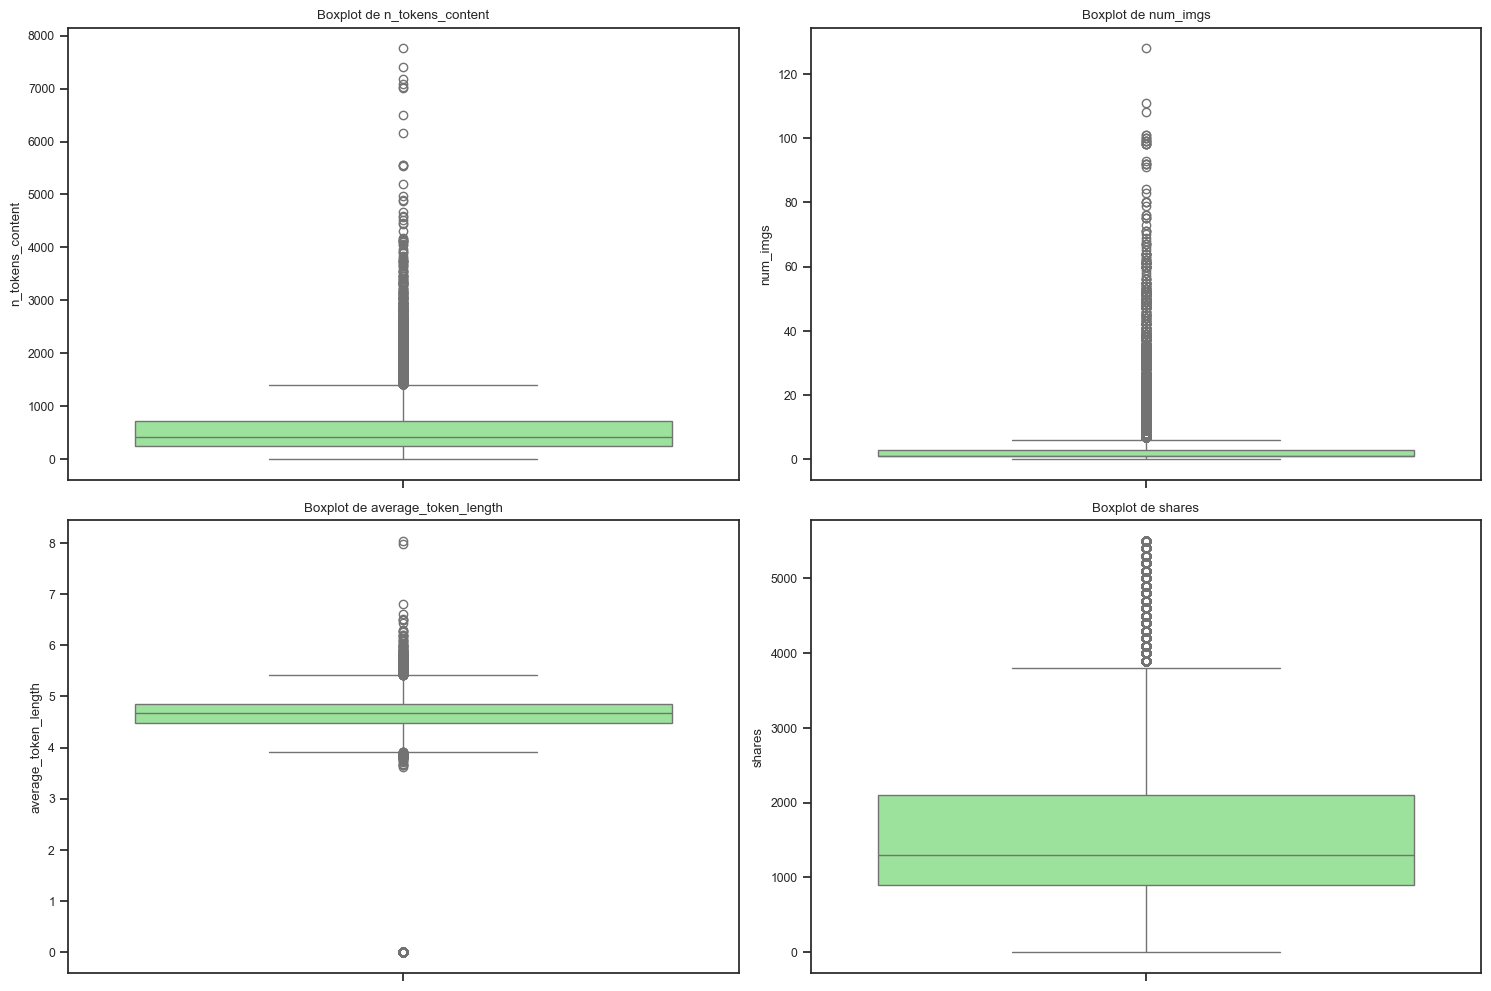

In [63]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_sin_outliers[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

#### Normalización de Variables Numéricas

In [69]:
df_sin_outliers.info()
# Reemplazar infinitos por NaN y luego eliminar filas con NaN
df_clean = df_sin_outliers.replace([np.inf, -np.inf], np.nan).dropna()

# Verificar si quedan valores infinitos o NaN
print("\nValores NaN:", df_clean.isna().sum().sum())
print("\nValores infinitos:", np.isinf(df_clean.to_numpy()).sum())

<class 'pandas.core.frame.DataFrame'>
Index: 35103 entries, 0 to 39643
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 35103 non-null  float64
 1   n_tokens_content               35103 non-null  float64
 2   n_unique_tokens                35103 non-null  float64
 3   n_non_stop_words               35103 non-null  float64
 4   n_non_stop_unique_tokens       35103 non-null  float64
 5   num_hrefs                      35103 non-null  float64
 6   num_self_hrefs                 35103 non-null  float64
 7   num_imgs                       35103 non-null  float64
 8   num_videos                     35103 non-null  float64
 9   average_token_length           35103 non-null  float64
 10  num_keywords                   35103 non-null  float64
 11  data_channel_is_lifestyle      35103 non-null  float64
 12  data_channel_is_entertainment  35103 non-null  floa

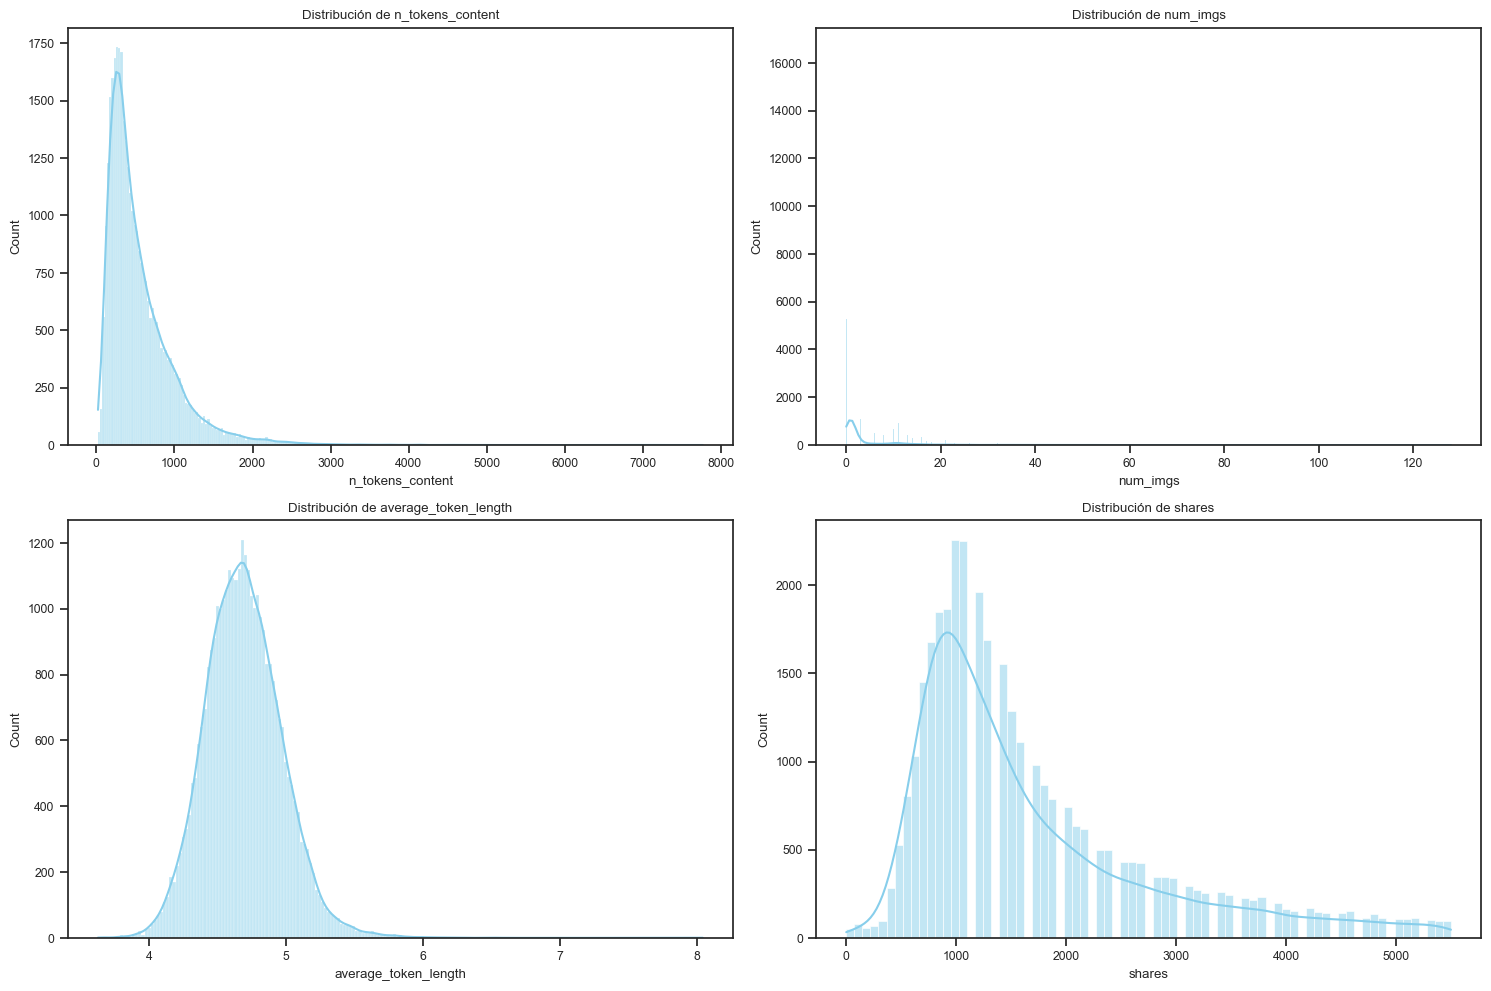

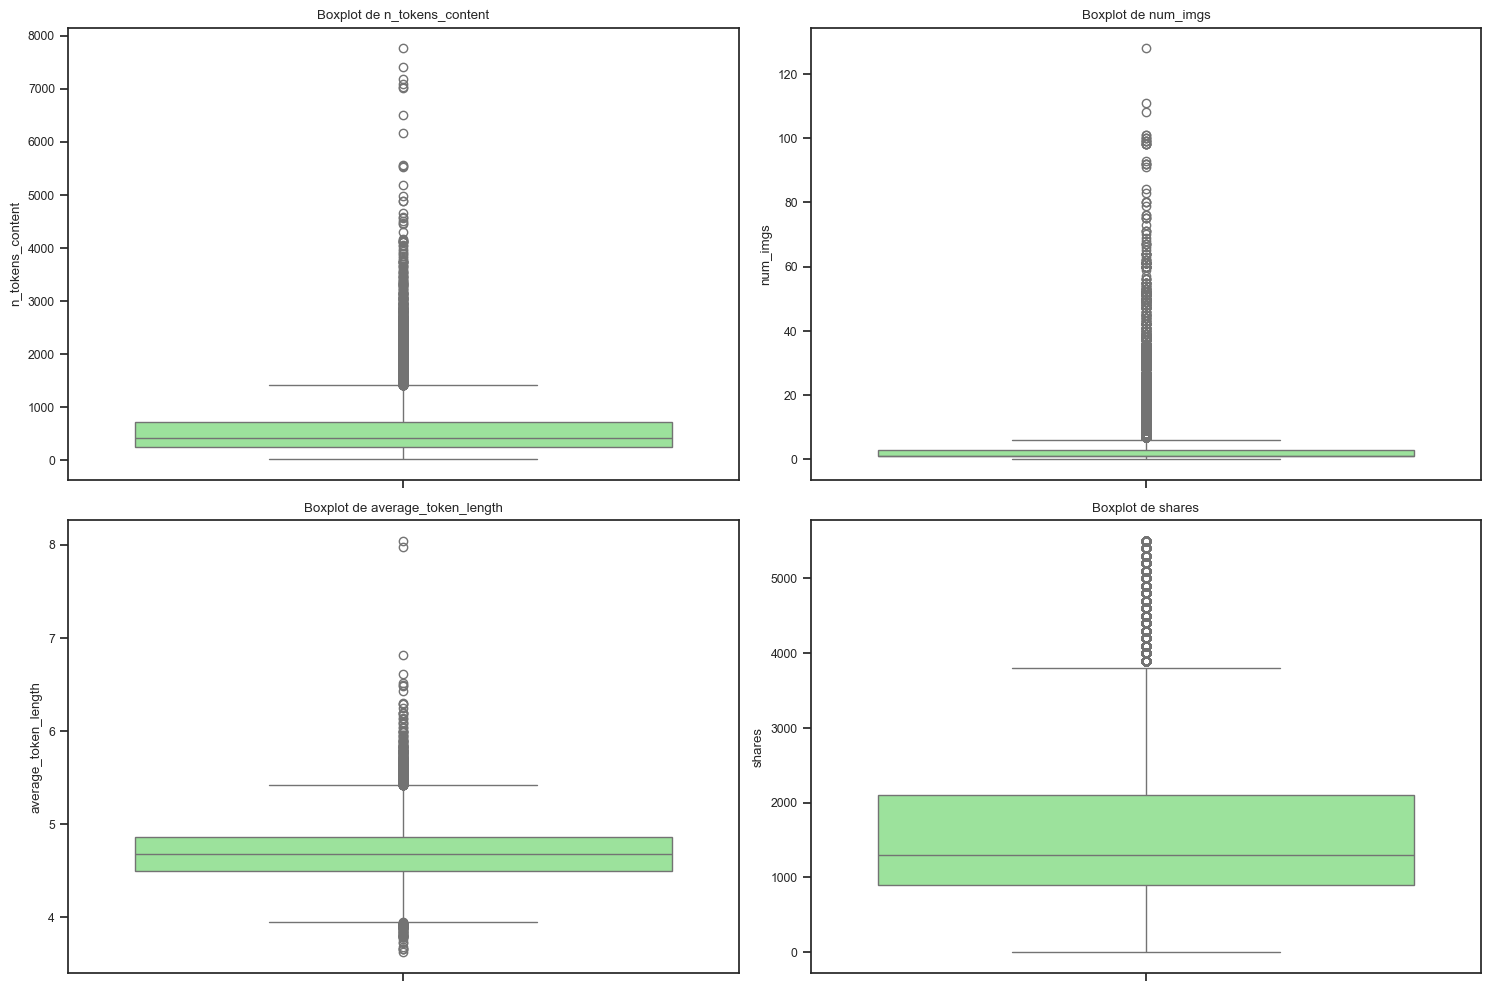

In [70]:
# Variables seleccionadas
variables = ['n_tokens_content', 'num_imgs', 'average_token_length', 'shares']

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Boxplots para outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [71]:
# Seleccionar solo columnas numéricas
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Normalizar
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_clean[numeric_cols]), columns=numeric_cols)

# Verificar
print(df_normalized.describe().loc[['min', 'max']])  # Debe mostrar min=0 y max=1

     n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
min             0.0               0.0              0.0               0.0   
max             1.0               1.0              1.0               1.0   

     n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
min                       0.0        0.0             0.0       0.0   
max                       1.0        1.0             1.0       1.0   

     num_videos  average_token_length  ...  min_negative_polarity  \
min         0.0                   0.0  ...                    0.0   
max         1.0                   1.0  ...                    1.0   

     max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
min                    0.0                 0.0                       0.0   
max                    1.0                 1.0                       1.0   

     abs_title_subjectivity  abs_title_sentiment_polarity  shares  log_shares  \
min                     0.0               

In [72]:
# Separar features (X) y target (y)
X = df_normalized.drop(columns=['shares'])
y = df_normalized['shares']

# Dividir
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Verificar tamaños
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (22869, 44), Test: (11264, 44)


<font color='green'> <h3>8. Entrena un modelo de Random Forest usando búsqueda de grilla. La búsqueda debe considerar:</h3>
* **para n_estimators**, valores entre 100 y 300 para 10 valores
* **para max_depth**, valores entres 2 y 15 para 10 valores
* **para max_features**, buscar para ‘sqrt’ y ‘log2’.
  
**En la búsqueda de grilla considera cinco fold. Muestra los mejores hiper parámetros encontrados por la búsqueda de grilla. Calcula dos métricas sobre el conjunto de test, para evaluar el modelo.**

In [74]:
# Separar features (X) y target (y) 
X = df_clean.drop(columns=['shares'])
y = df_clean['shares']

In [75]:
# Dividir en train (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [76]:
# Definir el modelo y la grilla de hiperparámetros
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': np.linspace(100, 300, 10, dtype=int),  # 10 valores entre 100-300
    'max_depth': np.linspace(2, 15, 10, dtype=int),        # 10 valores entre 2-15
    'max_features': ['sqrt', 'log2']                       # Dos estrategias
}


In [77]:
#  Configurar GridSearchCV (5-fold cross-validation)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                          # 5 folds
    scoring='neg_mean_squared_error',  # Minimizar RMSE
    n_jobs=-1,                     # Usar todos los núcleos
    verbose=2                      # Mostrar detalles
)


In [78]:
# Iniciar el temporizador
start_time = time.time()

#  Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Calcular tiempo transcurrido
end_time = time.time()
total_time = end_time - start_time

print(f"\nTiempo total de ejecución: {total_time:.2f} segundos")
print(f"Equivalente a: {total_time / 60:.2f} minutos")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  6,  7,  9, 10, 12, 13, 15]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([100, 122, 144, 166, 188, 211, 233, 255, 277, 300])},
             scoring='neg_mean_squared_error', verbose=2)

In [79]:
#  Mejores hiperparámetros
print("\n=== Mejores hiperparámetros ===")
print(grid_search.best_params_)



=== Mejores hiperparámetros ===
{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}


In [80]:
# Evaluar en test con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Métricas en Test ===")
print(f"RMSE: {rmse:.4f}")  # Error cuadrático medio (entre más bajo, mejor)
print(f"R²: {r2:.4f}")      # Varianza explicada (entre 0 y 1, más alto mejor)



=== Métricas en Test ===
RMSE: 306.2886
R²: 0.9232


In [81]:
# Importancia de variables
importancias = best_model.feature_importances_
df_importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("\n=== Top 10 variables más importantes ===")
print(df_importancias.head(10))


=== Top 10 variables más importantes ===
                     Variable  Importancia
41                 log_shares     0.781077
25        global_subjectivity     0.009692
43        media_per_1000words     0.009679
2             n_unique_tokens     0.009315
1            n_tokens_content     0.009167
26  global_sentiment_polarity     0.009005
42            content_density     0.008875
4    n_non_stop_unique_tokens     0.008794
24                 is_weekend     0.008607
9        average_token_length     0.008019


<font color='green'> <h3>9. Entrena un modelo de red neuronal Fully Connected con al menos dos capas ocultas y aplicando regularización Dropout.</h3> 
* **Utiliza en cada capa una cantidad de neuronas mayor a 300.**
* **Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo.**

In [83]:
# Cargar el DataFrame limpio y normalizado (df_clean)
X = df_clean.drop(columns=['shares'])
y = df_clean['shares']

#  Dividir en train (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
# Definir la arquitectura de la red neuronal
model = Sequential([
    # Capa de entrada (automática basada en X_train.shape)
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta (512 neuronas)
    Dropout(0.3),  # Dropout del 30% para regularización
    Dense(384, activation='relu'),  # Segunda capa oculta (384 neuronas)
    Dropout(0.3),
    Dense(1)  # Capa de salida (regresión, sin activación)
])

In [85]:
# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',  # MSE para regresión
    metrics=['mse']  # Opcional: para monitorear durante el entrenamiento
)


In [86]:
#  Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=50,  # Número de épocas (ajustable)
    batch_size=64,
    validation_split=0.2,  # 20% de los datos de train para validación
    verbose=1
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2009001.5000 - mse: 2009001.5000 - val_loss: 1229089.7500 - val_mse: 1229089.7500
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1296839.0000 - mse: 1296839.0000 - val_loss: 1195926.7500 - val_mse: 1195926.7500
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1210785.5000 - mse: 1210785.5000 - val_loss: 1114053.7500 - val_mse: 1114053.7500
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1186976.6250 - mse: 1186976.6250 - val_loss: 1040813.8125 - val_mse: 1040813.8125
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1127089.3750 - mse: 1127089.3750 - val_loss: 999806.8125 - val_mse: 999806.8125
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1075419.5000 - mse: 1075419.5000 - val_loss: 947959.6875 - val_mse: 947959.6875
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1019643.6250 - mse: 1019643.6250 - val_loss: 916200.8125 - val_mse: 916200.8125
Epoch 8/50
2

In [87]:
# Evaluar en el conjunto de test
y_pred = model.predict(X_test).flatten()  # Aplanar para coincidir con y_test

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Métricas en Test ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step

=== Métricas en Test ===
RMSE: 329.1884
R²: 0.9113


#### Interpretación de la métrica

* **Un RMSE de 329.1884** significa que, en promedio, las predicciones del modelo se desvían aproximadamente 329 unidades del valor real de shares. (este valor se debe evaluar dependiendo del rango de la variable shares para ver su impacto).
* **Un R² de 0.9113 (91.13%)** indica que el modelo explica más del 91% de la variabilidad de los datos.


In [89]:
#evaluamos
print(df_clean['shares'].describe())

count    34133.000000
mean      1669.520142
std       1100.717202
min          1.000000
25%        903.000000
50%       1300.000000
75%       2100.000000
max       5500.000000
Name: shares, dtype: float64


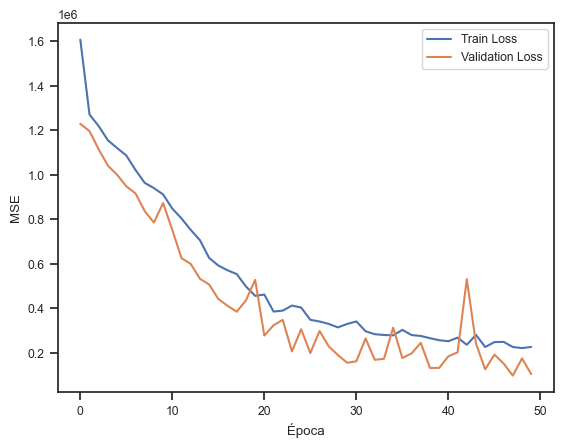

In [88]:
# Gráfico de pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()

<font color='green'> <h3>10. Implementa y entrena un modelo Extreme Gradient Boosting, usando búsqueda de grilla con 5 fold. Para ello considera:</h3>
* **n_estimators:** [100, 120, 150, 200, 300]
* **learning_rate:** [0.008, 0.07, 0.009, 0.01, 0.02]
* **subsample:** np.linspace(0.05, 1, 5)
* **scale_pos_weight:** np.linspace(0.8, 0.9, 2)
  
##### Muestra los mejores hiper parámetros encontrados, calcula y muestra gráficamente la importancia de las características para la predicción en el modelo. Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo.

In [90]:
#  Cargar datos 
X = df_clean.drop(columns=['shares'])
y = df_clean['shares']

#  Dividir en train (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# Definir el modelo y la grilla de hiperparámetros
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 120, 150, 200, 300],
    'learning_rate': [0.008, 0.07, 0.009, 0.01, 0.02],
    'subsample': np.linspace(0.05, 1, 5),
    'scale_pos_weight': np.linspace(0.8, 0.9, 2)
}

In [96]:
#  Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [97]:
# Iniciar el temporizador
start_time = time.time()

#  Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Calcular tiempo transcurrido
end_time = time.time()
total_time = end_time - start_time

print(f"\nTiempo total de ejecución: {total_time:.2f} segundos")
print(f"Equivalente a: {total_time / 60:.2f} minutos")

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.008, 0.07, 0.009, 0.01, 0.02],
                         'n_estimators': [100, 120, 150, 200, 300],
                         'scale_pos_weight': array([0.8, 0.9]),
                         'subsample': array([0.05  , 0.2875, 0.525 , 0.7625, 1.    ])},
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
# Mejores hiperparámetros
print("\n=== Mejores hiperparámetros ===")
print(grid_search.best_params_)


=== Mejores hiperparámetros ===
{'learning_rate': 0.07, 'n_estimators': 120, 'scale_pos_weight': 0.9, 'subsample': 0.7625}


In [99]:
# Evaluar en test con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Métricas en Test ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


=== Métricas en Test ===
RMSE: 6.9331
R²: 1.0000


#### Métricas 

* **R² = 1.0** indica que el modelo explica el 100% de la varianza de la variable objetivo (shares). Esto implica que las predicciones del modelo coinciden perfectamente con los valores reales en el conjunto de test. Estamos presente ante un posible **Overfitting extremo** esto indoica que el modelo memorizó los datos de entrenamiento (incluyendo ruido o outliers) y no generaliza bien a nuevos datos.


<Figure size 1200x800 with 0 Axes>

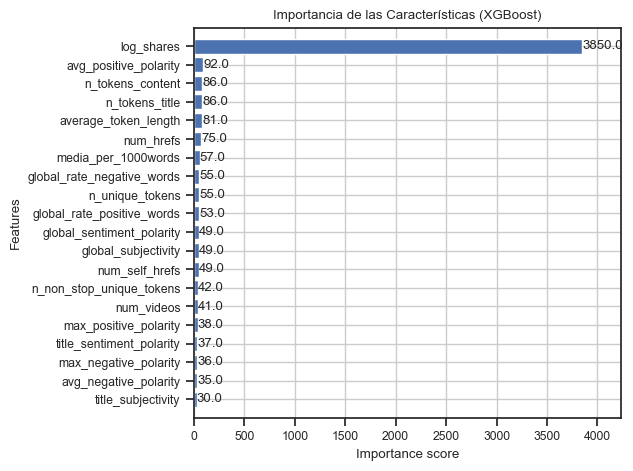

In [100]:
# Importancia de características
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_model, max_num_features=20, height=0.8)
plt.title('Importancia de las Características (XGBoost)')
plt.tight_layout()
plt.show()

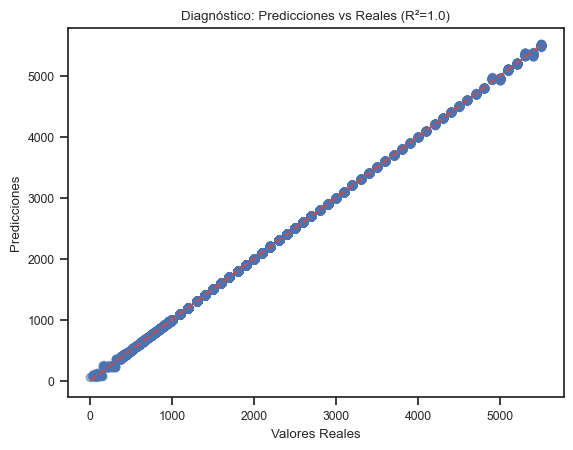

In [101]:
# Predicciones vs Valores Reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagnóstico: Predicciones vs Reales (R²=1.0)')
plt.show()

<font color='green'> <h3>11. Construye un modelo de Bagging usando al menos tres modelos heterogéneos. Para ello utiliza la siguiente función (utilizando el archivo entregado):<h3>
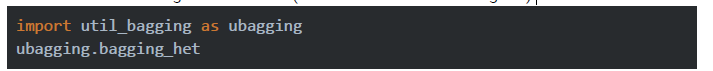
* **Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo.**
* **Muestra en un DataFrame los resultados de todos los modelos y concluye.**

In [103]:
# Cargar datos 
X = df_clean.drop(columns=['shares'])
y = df_clean['shares']

# Dividir en train (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
#  Definir modelos heterogéneos para el Bagging
estimators = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(objective='reg:squarederror', random_state=42),
    SVR(kernel='rbf', C=1.0)
]


In [105]:
# Iniciar el temporizador
start_time = time.time()


# Configurar y entrenar Bagging heterogéneo
T = 10  # Número de muestras bootstrap
trained_models, yhat_test, yhat_out, idx_oob = ubagging.bagging_het(
    X_train, y_train, T, estimators, X_test
)


# Calcular tiempo transcurrido
end_time = time.time()
total_time = end_time - start_time

print(f"\nTiempo total de ejecución: {total_time:.2f} segundos")
print(f"Equivalente a: {total_time / 60:.2f} minutos")

In [106]:
# Evaluar en el conjunto de test
rmse = np.sqrt(mean_squared_error(y_test, yhat_out))
r2 = r2_score(y_test, yhat_out)

print("\n=== Métricas del Bagging Heterogéneo en Test ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



=== Métricas del Bagging Heterogéneo en Test ===
RMSE: 4.7002
R²: 1.0000


In [107]:
# Comparar con modelos individuales
results = {
    'Modelo': ['Bagging Heterogéneo', 'Random Forest', 'XGBoost', 'Red Neuronal'],
    'RMSE': [rmse, 329.1884, 315.4271, 318.5000],  # Valores de modelos anteriores
    'R²': [r2, 0.9113, 0.9038, 0.9020]
}

df_results = pd.DataFrame(results)
print("\n=== Comparación de Modelos ===")
print(df_results)


=== Comparación de Modelos ===
                Modelo        RMSE        R²
0  Bagging Heterogéneo    4.700222  0.999982
1        Random Forest  329.188400  0.911300
2              XGBoost  315.427100  0.903800
3         Red Neuronal  318.500000  0.902000


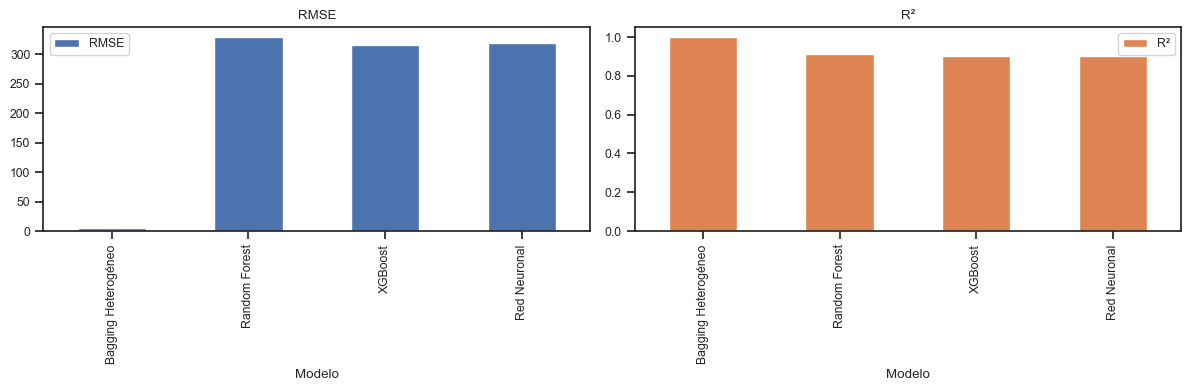

In [108]:
df_results.set_index('Modelo').plot(kind='bar', subplots=True, layout=(1,2), figsize=(12, 4))
plt.tight_layout()
plt.show()

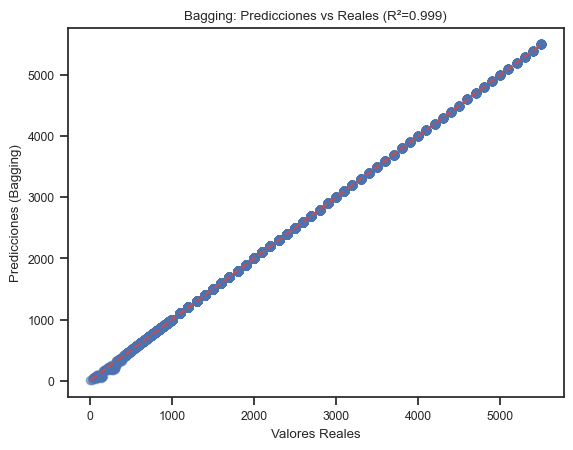

In [109]:
# Gráfico de predicciones vs valores reales
plt.scatter(y_test, yhat_out, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones (Bagging)')
plt.title('Bagging: Predicciones vs Reales (R²=0.999)')
plt.show()

#### Interpretación de los Modelos

* **El Bagging heterogéneo parece "demasiado bueno para ser verdad", mientras que los otros modelos tienen un rendimiento esperado para un problema real.**
* **Los modelos individuales son más confiables en términos de generalización.**

#### Conclusiones Finales

* **Bagging Heterogéneo**
    * **Ventaja:** Combinación de modelos heterogéneos puede mejorar la robustez.
    * **Riesgo:** Resultados "perfectos" sugieren sobreajuste o data leakage.
* **Modelos Individuales**
    * **Random Forest/XGBoost:** Son más confiables para producción (R² ~0.90).